In this notebook, I'll be exploring the data related to diseases, categorizing them, summarizing findings and saving the final results into csv files.

In [40]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('original_disease_data.csv')

In [3]:
df.describe(include = 'all')

,participant_ID,disease_prefer_not_to_answer,disease_diabetes,disease_high_blood_pressure,disease_heart,disease_none,disease_other
count,4054,331,492,647,269,2243,346
unique,4054,1,1,1,1,1,273
top,ns 757,prefer not to answer,diabetes,high blood pressure,heart disease,no health conditions,asthma
freq,1,331,492,647,269,2243,9


In [4]:
# checking out unique values in the other column:
df.disease_other.unique()

array(['hiv, hbv, kidney disease, hypertension, auto-immune disorder, reactive arthritis',
       'siadika - back pain',
       'arthritis, cancer, bones spurs, sponges kidneys', nan,
       'hiv copd athsma', 'hiv', 'colorectal,  mental health',
       'hiv+, fibromyalgia, chronic pain, arthritis, weight gain due to hiv medications',
       'aids', 'hiv positive', 'no i am perfectly fine', 'pcos, pots',
       'mental health and chronic pain', 'aids x 2   couple',
       'mold and asbestos exsposure',
       'lung transplant  ×2  2 heart attacks  stroke  septic shock  several surgeries',
       'bi polar disorder', 'epilepsy', 'ms', 'icd',
       'migraines, dysautonomia (pots)', 'hiv  hep b',
       'multi organ failure, chronic osteonecrosis and osteomyelitis of the jaws, osteoarthritis, severe gastroparesis and malabsorption, long covid',
       'i have plantar fashitus {spelling is terrible} and i am on a puffer cause sometimes run out of breath',
       'physical disabilities, mo

I'll create a dictionary and map the diseases in the responses above to them, then create new columns for categories that are not already in the dataframe.

In [5]:
# Define the mapping of health conditions
categories = {
    
    'autoimmune and inflammatory diseases': ['auto-immune', 'auto immune', 'autoimmune', 'rheumatoid','arthritis', 'arthrithies',
                                            'lupus', 'crohn\'s', 'chrons', 'chroncs' ,'psoriasis', 'scleroderma', 'multiple sclerosis',
                                            'mediterranean', 'hashimoto\'s', 'thyroiditis', 'gout', 'ankylosing', 'spondylitis', 
                                            'sickle', 'bones', 'joint', 'ra&oa', 'raynauds','hidradenitis',
                                            'suppurativa', 'eczema', 'ulcerative' ,'colitis', 'rheumatism','arthritic', 
                                            'anemia', 'hyperthyroid', 'hypothyroidism', 'thyroid', 'crohnâ€™s'],
    
    'back pain/ disc issues': ['back', 'spinal', 'stenosis', 'disc', 'disk', 'sciatic', 'saytic', 'spine', 'scoliosis', 
                              'post-polio muscular atrophy', 'cervicalgia' ],
    
    'heart/ cardiovascular': ['heart',  'cholesterol',  'icd', 'svt', 'stroke', 'angina', 'bypass',
                               'hypercholestérolémie', 'cholostoral', 'cardiovascular', 'septic shock' , 'high triglycerides'],
    
    'high blood pressure': ['hypertension', 'blood pressure',],
    
    'chronic diseases': ['fibromyalgia', 'chronic', 'ra&oa','knee', 'knees', 'osteonecrosis','osteomyelitis', 'liver', 
                         'prostate', 'cancer', 'brain', 'kidney','sponges','kidneys', 'colorectal', 'pre-osteoporosis', 'osteoporosis',
                         'long covid', 'obesity', 'thalassemia', 'bones', 'bons', 'old', 'pots', 'pcos', 'hormonal', 'hip',
                         'multiple conditions', 'hypercholestérolémie', 'cholostoral','cholesterol','sclerosis', 'plantar', 'tendinitis',
                         'tendonitis', 'ehler', 'iron', 'high triglycerides', 'osteoarthritis','bursitis' ,'fibromyalgia', 
                         'gastroparesis', 'malabsorption', 'failure', 'weight', 'permanently injured', 'back', 'spinal', 
                         'stenosis', 'disc', 'disk', 'sciatic', 'saytic', 'spine', 'scoliosis', 'post-polio muscular atrophy', 'cervicalgia',
                         'flat feet', 'spurs', 'fasciitis', 'anemia', 'hyperthyroid', 'hypothyroidism', 'thyroid', 'sickle', 'thalassemia',
                         'blood', 'surgery', 'surgeries', 'incontinence', 'crohnâ€™s'],
    
    'diabetes': ['diabetes', 'pre-diabetic', 'diabetic', 'type', 'insulin resistance', 'glacemic', 'sugar', 'pre diabetes', 'pre-diabetes'],
    
    'dental problems': ['dental', 'osteonecrosis', 'osteomyelitis', 'teeth'],
    
    'digestive disorders': ['ulcer','pancreas', 'gerd', 'haemorrhoid', 'liver', 'eating', 'irritable bowel', 'ibs', 'stones',
                            'diverticulitis', 'celiac', 'crohn\'s', 'chrons', 'chroncs' , 'colitis', 'gastritis','gastrointestinal', 
                            'food','malabsorption', 'ulcerative', 'lactose', 'wheat', 'gluten', 'throat', 'nutrition', 'digestive', 'indigestion'],
    
    'disability': ['physical', 'mobility', 'disability', 'weakness', 'disabled', 'wheelchair', 'walking limitation', 'immobile'],
    
       
    'infectious diseases': ['hiv', 'aids', 'hepatitis', 'tuberculosis', 'std', 'syphilis', 'hep', 'lyme', 'infectious', 'hbsag'],
    
    
    'mental health disorders': ['depression', 'anxiety', 'bipolar', 'bi-polar', 'bi polar', 'schizophrenia', 'psychological','addict', 
                      'stress','ptsd', 'ocd', 'psychosis', 'addiction', 'mental', 'alcohol', 'bpd', 'tbi',
                    'brain', 'dissociative identity', 'adhd', 'add','sleeping', 'panic', 'insomnia',],
    
    
    'multiple sclerosis': ['multiple sclerosis'],
    
    'neurological disorders': ['epilepsy', 'epilepsi','ataxia','migraine','parkinson\'s', 'alzheimer\'s', 'stroke', 'sciatica',
                               'seizure', 'pots', 'ehler', 'eds','nerve', 'headache', 'dementia', 'neuropathy', 'neurological', 
                               'tendinitis','autistic', 'autism', 'neuritis', 'cerebral palsy', ],
    
    'multiple conditions': ['multiple conditions', 'number', 'brain', 'cancer', 'multi organ failure', 'post-polio muscular atrophy', 'several surgeries'],
    
    'respiratory conditions': ['asthma', 'copd', 'emphazima','emphysema', 'enphzema', 'puffer','bronchitis', 'bronchitis', 'lung', 'respiratory', 'breathing', 'mold'],
    
    'sensory_impairments': ['hearing', 'vision', 'sensory', 'blind', 'eye'],
    
    'allergies' : ['intolerance', 'allergies', 'allergic', 'allergy', 'dietary'],
    
    'urinary issues': ['incontinence'],
    
    'prefer not to answer' : ['.',  "i'll", 'street',  'investigations', 'other', 'catter'],
    
    'no health conditions': ['no other','fine','none', 'no i', 'pregnant', 'any', 'no medical']
    
}


In [6]:
# Now, I'll create columns which don't already exist in the original dataframe:
df[['disease_autoimmune_and_inflammatory_diseases', 'disease_back pain/ disc issues', 'disease_chronic_diseases','disease_dental_problems', 
    'disease_digestive_disorders', 'disease_disability', 'disease_infectious_diseases', 'disease_mental_health_disorders',
    'disease_multiple_sclerosis', 'disease_neurological_disorders', 'disease_multiple_conditions', 'disease_respiratory_conditions',
    'disease_sensory_impairments', 'disease_allergies', 'disease_urinary_issues']] = None

In [7]:
# Function to classify answers based on keywords
def classify_disease(answer, keywords):
    
    if isinstance(answer, str):
        answer_lower = answer.lower()
        matched_options = []
        
        answer_lower = answer_lower.strip().lstrip()
        
        if answer_lower == 'ms':
            answer_lower = 'multiple sclerosis'
        
        elif answer_lower == 'no':
            answer_lower = 'none'
            
        for option, keywords in keywords.items():
            if any(keyword in answer_lower for keyword in keywords):
                if option not in matched_options:
                    matched_options.append(option)
        
        terms = ['prefer not to answer', 'no health conditions']
    
        for term in terms:
         
            if  term in matched_options:
                if len(matched_options) > 1:
                    matched_options.remove(term)
        return '; '.join(matched_options) if matched_options else answer
    
    elif type(answer) == float:
        return answer
       
    return

In [8]:
# Apply the function to map each answer to provided options
df['mapped_disease'] = df['disease_other'].apply(lambda x: classify_disease(x, categories))

In [9]:
df.isna().sum()

participant_ID                                     0
disease_prefer_not_to_answer                    3723
disease_diabetes                                3562
disease_high_blood_pressure                     3407
disease_heart                                   3785
disease_none                                    1811
disease_other                                   3708
disease_autoimmune_and_inflammatory_diseases    4054
disease_back pain/ disc issues                  4054
disease_chronic_diseases                        4054
disease_dental_problems                         4054
disease_digestive_disorders                     4054
disease_disability                              4054
disease_infectious_diseases                     4054
disease_mental_health_disorders                 4054
disease_multiple_sclerosis                      4054
disease_neurological_disorders                  4054
disease_multiple_conditions                     4054
disease_respiratory_conditions                

In [10]:
# overview of responses with "no health conditions" in the mapped disease column
df[df.mapped_disease.str.contains('no health conditions') == True].disease_other

14                              no i am perfectly fine
447                         no other health conditions
538                                               none
724                                                 no
771                                  no i donâ€™t have
945                              no medical conditions
2245                                              none
2253                                              none
2571                                          pregnant
2708                                              none
2736                                              none
2829                                                no
3207                                                no
3308                                                no
3344    i don't have any illness, but my wife is sick.
Name: disease_other, dtype: object

In [11]:
#Now we can drop the  other column:
df.drop('disease_other', axis = 1, inplace = True)

In [12]:
# create a function to consolidate the data:
def consolidate_row(row):
    """ 
    Consolidate answers from a DataFrame row, excluding the first and last columns.

    This function processes a row from a DataFrame to:
    1. Create a list of consolidated answers from specified columns, excluding the "participant_ID" (first column) and the last column.
       - Only non-null and non-empty values are included in the list.
    2. Count the number of answers provided.
    3. If the consolidated list contains "prefer not to answer", the list is updated to contain only this value.
    4. Return the consolidated answers as a single string and the count of answers.

    Parameters:
    row (pd.Series): A row from a DataFrame containing answers to be consolidated.

    Returns:
    tuple: A tuple containing:
           - A string of consolidated answers, joined by '; '.
           - An integer count of the number of answers provided.
    """
        
    consolidated = []
    
    # Loop through the specified columns excluding the "participant_ID" :
    for value in row.iloc[1:]:
        
        if pd.notna(value)  and value != '':
            values = value.split(';')
            for value in values:
                if value not in consolidated:
                    consolidated.append(value)
    
    if len(consolidated) == 0:
        consolidated_answer = 'prefer not to answer'
        number_of_answers = 0
    
    else:
        consolidated_answer = ';'.join(consolidated)
    
        # finding out how many answers were provided:
        number_of_answers = len(consolidated_answer.split(';'))
            
   
        terms = ['none of the above', 'prefer not to answer', 'no health conditions']
    
        for term in terms:
            if  term in consolidated:
                if number_of_answers > 1:
                    consolidated.remove(term)
                    number_of_answers = len(consolidated)
        
        consolidated_answer = ';'.join(consolidated)
    
            
    
    return consolidated_answer , number_of_answers

In [13]:
# Apply the consolidate_row function to each row and create new columns:
df[['diseases_consolidated', 'number_of_diseases']] = df.apply(
        lambda row: pd.Series(consolidate_row(row)), axis=1 )

In [39]:
df.describe(include = 'all')

,participant_ID,disease_prefer_not_to_answer,disease_diabetes,disease_high_blood_pressure,disease_heart,disease_none,disease_autoimmune_and_inflammatory_diseases,disease_back pain/ disc issues,disease_chronic_diseases,disease_dental_problems,...,disease_multiple_sclerosis,disease_neurological_disorders,disease_multiple_conditions,disease_respiratory_conditions,disease_sensory_impairments,disease_allergies,disease_urinary_issues,diseases_consolidated,number_of_diseases,disease_bin
count,4054,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,...,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054,4054.000000,4054
unique,4054,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,126,NaN,4
top,ns 757,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no health conditions,NaN,0
freq,1,3612.0,3553.0,3404.0,3760.0,2237.0,3989.0,4017.0,3288.0,4049.0,...,4049.0,4024.0,4035.0,4012.0,4042.0,4041.0,4053.0,2237,NaN,2237
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.122348,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.569241,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [15]:
# Since all mapped diseases are in the consolidated column as described, i'll drop the mapped column:
df.drop('mapped_disease', axis = 1, inplace = True)

In [16]:
# overview
df.describe(include = 'all')

,participant_ID,disease_prefer_not_to_answer,disease_diabetes,disease_high_blood_pressure,disease_heart,disease_none,disease_autoimmune_and_inflammatory_diseases,disease_back pain/ disc issues,disease_chronic_diseases,disease_dental_problems,...,disease_mental_health_disorders,disease_multiple_sclerosis,disease_neurological_disorders,disease_multiple_conditions,disease_respiratory_conditions,disease_sensory_impairments,disease_allergies,disease_urinary_issues,diseases_consolidated,number_of_diseases
count,4054,331,492,647,269,2243,0,0,0,0,...,0,0,0,0,0,0,0,0,4054,4054.000000
unique,4054,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,126,NaN
top,ns 757,prefer not to answer,diabetes,high blood pressure,heart disease,no health conditions,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no health conditions,NaN
freq,1,331,492,647,269,2243,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2237,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121115
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566246
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [17]:
# first, I'll set all values in the desired columns to 0
df.iloc[:, 1:-2] = 0

In [18]:
df.columns

Index(['participant_ID', 'disease_prefer_not_to_answer', 'disease_diabetes',
       'disease_high_blood_pressure', 'disease_heart', 'disease_none',
       'disease_autoimmune_and_inflammatory_diseases',
       'disease_back pain/ disc issues', 'disease_chronic_diseases',
       'disease_dental_problems', 'disease_digestive_disorders',
       'disease_disability', 'disease_infectious_diseases',
       'disease_mental_health_disorders', 'disease_multiple_sclerosis',
       'disease_neurological_disorders', 'disease_multiple_conditions',
       'disease_respiratory_conditions', 'disease_sensory_impairments',
       'disease_allergies', 'disease_urinary_issues', 'diseases_consolidated',
       'number_of_diseases'],
      dtype='object')

In [19]:
len(df[df.diseases_consolidated == ('no health conditions')])

2237

In [20]:
df[df.diseases_consolidated.str.contains('no health conditions')].diseases_consolidated.value_counts()

diseases_consolidated
no health conditions    2237
Name: count, dtype: int64

In [21]:
# Now, I am going to replace the values in each column: 1 is indicated in the column that matches any of the consoldiated value:
for x in df.index:
    values = df.diseases_consolidated.iloc[x].split(';')
    
    dictionary_words = {'prefer': df.columns[1],
                     'diabetes' : df.columns[2],
                     'high blood pressure' : df.columns[3],
                     'heart' : df.columns[4],
                     'no health conditions' : df.columns[5],
                     'autoimmune' : df.columns[6],
                     'back': df.columns[7],
                     'chronic' : df.columns[8],
                     'dental' : df.columns[9],
                     'digestive' : df.columns[10],
                     'disability' : df.columns[11],
                     'infectious' : df.columns[12],
                     'mental' : df.columns[13],
                    'multiple sclerosis' : df.columns[14],
                    'neurological' : df.columns[15],
                    'multiple conditions': df.columns[16],
                    'respiratory': df.columns[17],
                    'sensory' : df.columns[18],
                    'allergies' : df.columns[19],
                    'urinary' : df.columns[20]
                     }
    
    # ensuring when 'prefer not to answer' is the answer, we only get 1 in that column.
    if 'prefer not to answer' in values:
        df.iloc[x, 1] = 1

    
    # filling in 1 in matching columns:
    else:
        for value in values:
                        
            for key in dictionary_words.keys():
                if key in value:
                    column = dictionary_words[key]
                    df.loc[x, [column]] = 1
    
    # setting up the answer to "chronic illness" to 1, if high blood pressure is chosen.
    if df.iloc[x, 3] == 1:
        df.iloc[x, 8] = 1
    
    # setting up the value for the number_of_diseases to be 3 if the answer is "multiple conditions"
    if df.iloc[x, 16] == 1:
        if df.iloc[x, -1] < 3:
            df.iloc[x, -1] = 3                

In [22]:
df.describe(include = 'all')

,participant_ID,disease_prefer_not_to_answer,disease_diabetes,disease_high_blood_pressure,disease_heart,disease_none,disease_autoimmune_and_inflammatory_diseases,disease_back pain/ disc issues,disease_chronic_diseases,disease_dental_problems,...,disease_mental_health_disorders,disease_multiple_sclerosis,disease_neurological_disorders,disease_multiple_conditions,disease_respiratory_conditions,disease_sensory_impairments,disease_allergies,disease_urinary_issues,diseases_consolidated,number_of_diseases
count,4054,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,...,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054,4054.000000
unique,4054,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,126,NaN
top,ns 757,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no health conditions,NaN
freq,1,3612.0,3553.0,3404.0,3760.0,2237.0,3989.0,4017.0,3288.0,4049.0,...,3984.0,4049.0,4024.0,4035.0,4012.0,4042.0,4041.0,4053.0,2237,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.122348
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.569241
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   participant_ID                                4054 non-null   object
 1   disease_prefer_not_to_answer                  4054 non-null   object
 2   disease_diabetes                              4054 non-null   object
 3   disease_high_blood_pressure                   4054 non-null   object
 4   disease_heart                                 4054 non-null   object
 5   disease_none                                  4054 non-null   object
 6   disease_autoimmune_and_inflammatory_diseases  4054 non-null   object
 7   disease_back pain/ disc issues                4054 non-null   object
 8   disease_chronic_diseases                      4054 non-null   object
 9   disease_dental_problems                       4054 non-null   object
 10  

Now, I'll create bins for number of diseases:

In [24]:
# I will create a summary where # of diseases is categorized into more generic bins ('none', '1-2', '3+')
bins = {
    'prefer not to answer': df.diseases_consolidated == 'prefer not to answer',
    '0': df.diseases_consolidated == 'no health conditions',
    '1-2': (df.number_of_diseases != 0) & (df.number_of_diseases < 3),
    '3+': df.number_of_diseases >= 3,
}

In [25]:
# Create a new column in the DataFrame
df['disease_bin'] = np.select(list(bins.values()),list(bins.keys()), default='unknown')

In [26]:
# save the dataframe as a csv file.
df.to_csv('NS_diseases_mapped_consolidated_binned.csv', index = False)

In [27]:
# create a quick summary:
overall_summary = df.iloc[:, -2:].groupby('disease_bin').count().sort_values(by = 'number_of_diseases')

In [28]:
# view results:
overall_summary

,number_of_diseases
disease_bin,
3+,124
prefer not to answer,442
1-2,1251
0,2237


In [29]:
# changing the column name:
overall_summary.columns = ['total']

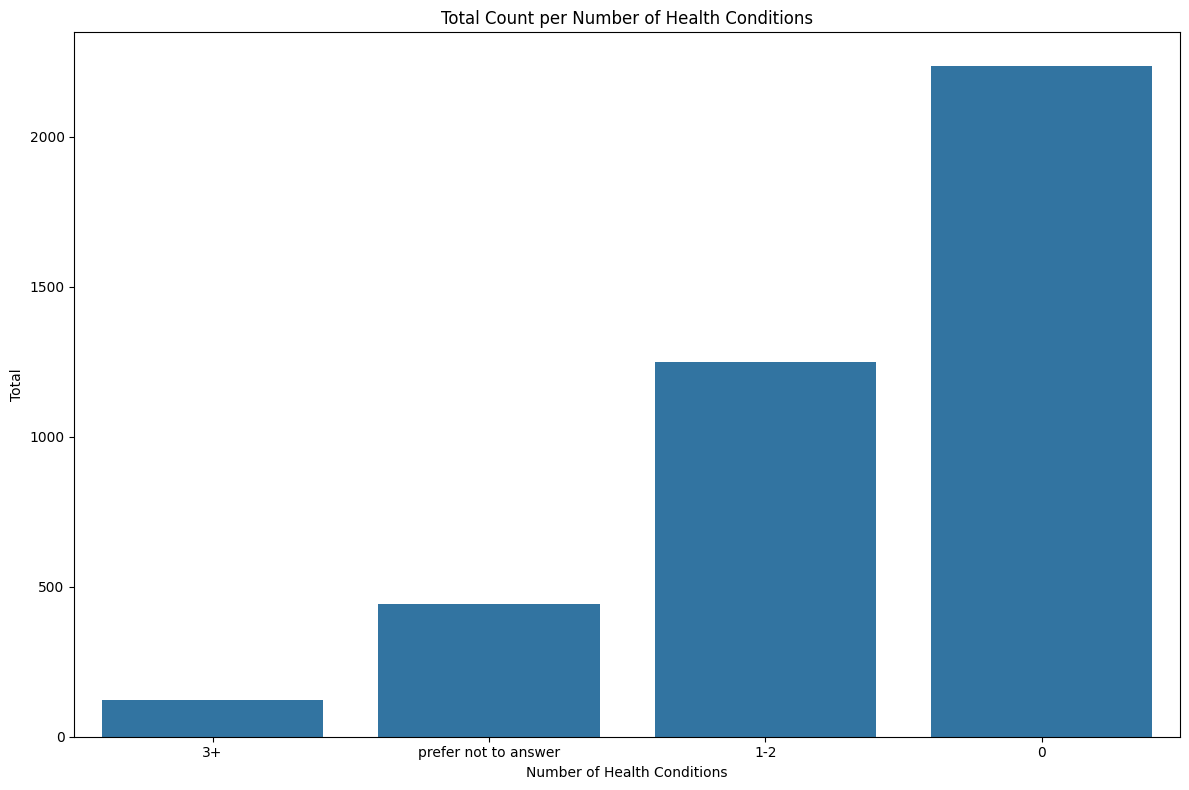

In [30]:
# plotting the overall_summary results:

plt.figure(figsize=(12, 8))
sns.barplot(
    data= overall_summary,
    x ='disease_bin',
    y ='total',
    errorbar=None
)

#plt.xticks(rotation=90)
plt.xlabel('Number of Health Conditions')
plt.ylabel('Total')
plt.title('Total Count per Number of Health Conditions')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('diseases_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [31]:
# save the above summary into a csv file:
overall_summary.to_csv('binned_diseases.csv')

In [32]:
# summary of disease categories counts in total without bins:
summary = {}
for column in df.columns[1:-3]:
    disease = column.split('_')
    disease = ' '.join(disease[1:])
    
    if disease == 'none':
        disease = 'no health conditions'
    elif disease == 'heart':
        disease = 'heart disease'
        
    summary.update({disease: df[column].sum(axis = 0)})

In [33]:
# create dataframe:
df_summary = pd.DataFrame({'disease' : summary.keys(),
             'total' : summary.values()})

In [34]:
# sort data:
df_summary = df_summary.sort_values(by = 'total', ascending = False)

In [35]:
df_summary

,disease,total
4,no health conditions,2237
7,chronic diseases,766
2,high blood pressure,650
1,diabetes,501
0,prefer not to answer,442
3,heart disease,294
12,mental health disorders,70
5,autoimmune and inflammatory diseases,65
16,respiratory conditions,42
6,back pain/ disc issues,37


In [36]:
# save the summary above into a csv file:
df_summary.to_csv('disease_summary.csv', index = False)

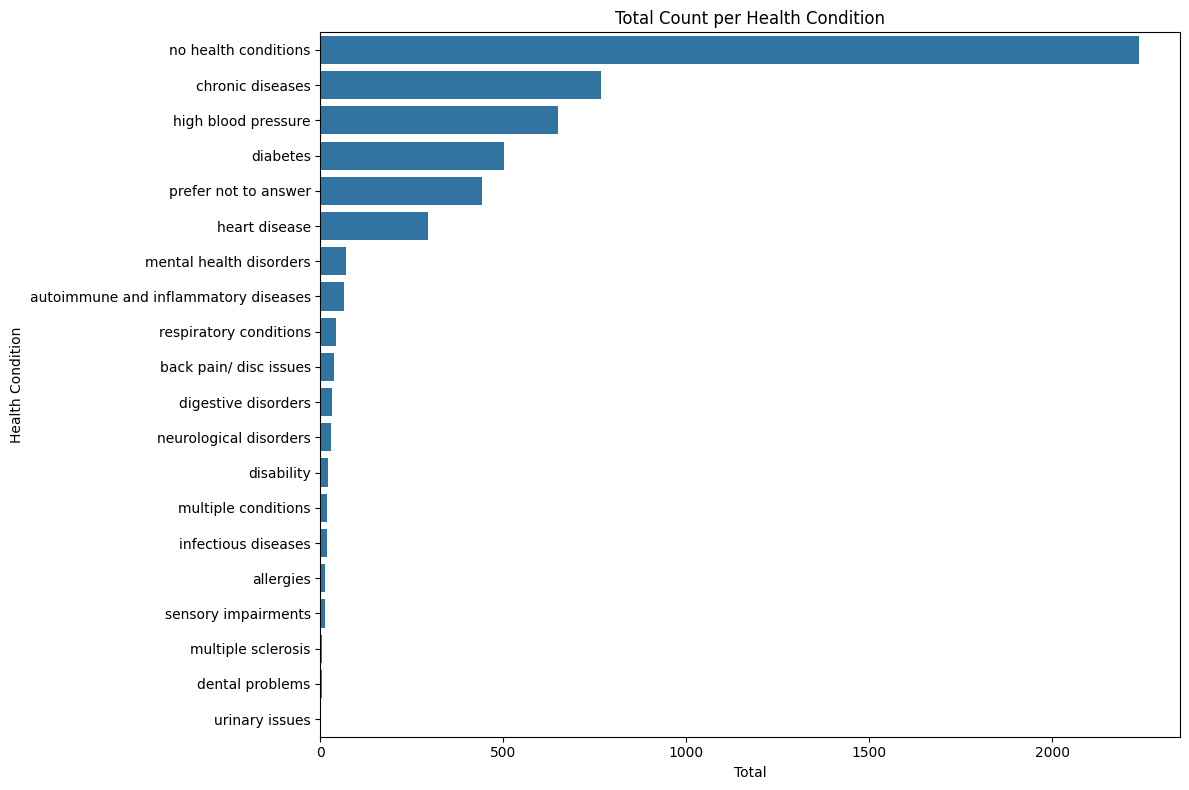

In [ ]:
# plotting the df_summary results:

plt.figure(figsize=(12, 8))
sns.barplot(
    data= df_summary,
    y ='disease',
    x ='total',
    errorbar=None
)

#plt.xticks(rotation=90)
plt.ylabel('Health Condition')
plt.xlabel('Total')
plt.title('Total Count per Health Condition')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('diseases_conditions_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()